<a href="https://colab.research.google.com/github/SURESHASWATHI/assignment/blob/main/svm_updated_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# Load the dataset - Please replace 'your_dataset.csv' with the actual filename
try:
    df = pd.read_csv('Pharma_Industry.csv')
    print("Dataset loaded successfully.")
    display(df.head())
except FileNotFoundError:
    print("Error: Dataset file not found. Please upload the dataset file and make sure the filename is correct.")

Dataset loaded successfully.


,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [4]:
# Display basic information about the dataset
print("Dataset Info:")
df.info()

# Display descriptive statistics
print("\nDescriptive Statistics:")
display(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB

Descriptive Statistics:


,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000
mean,-0.037761,0.214957,0.062871,0.054398,-0.171863,0.5200
std,0.979891,1.247567,0.971978,0.986001,0.983765,0.5001
min,-3.019512,-3.773897,-2.940389,-3.401277,-3.110431,0.0000
25%,-0.642003,-0.565168,-0.648157,-0.586085,-0.797715,0.0000
50%,-0.019340,0.201532,0.027732,-0.065661,-0.108106,1.0000
75%,0.641151,0.951375,0.710774,0.633914,0.513555,1.0000
max,2.949094,4.111751,3.193108,3.373269,2.518023,1.0000



Missing Values:
Drug Dosage (mg)                  0
Systolic Blood Pressure (mmHg)    0
Heart Rate (BPM)                  0
Liver Toxicity Index (U/L)        0
Blood Glucose Level (mg/dL)       0
Drug Response                     0
dtype: int64


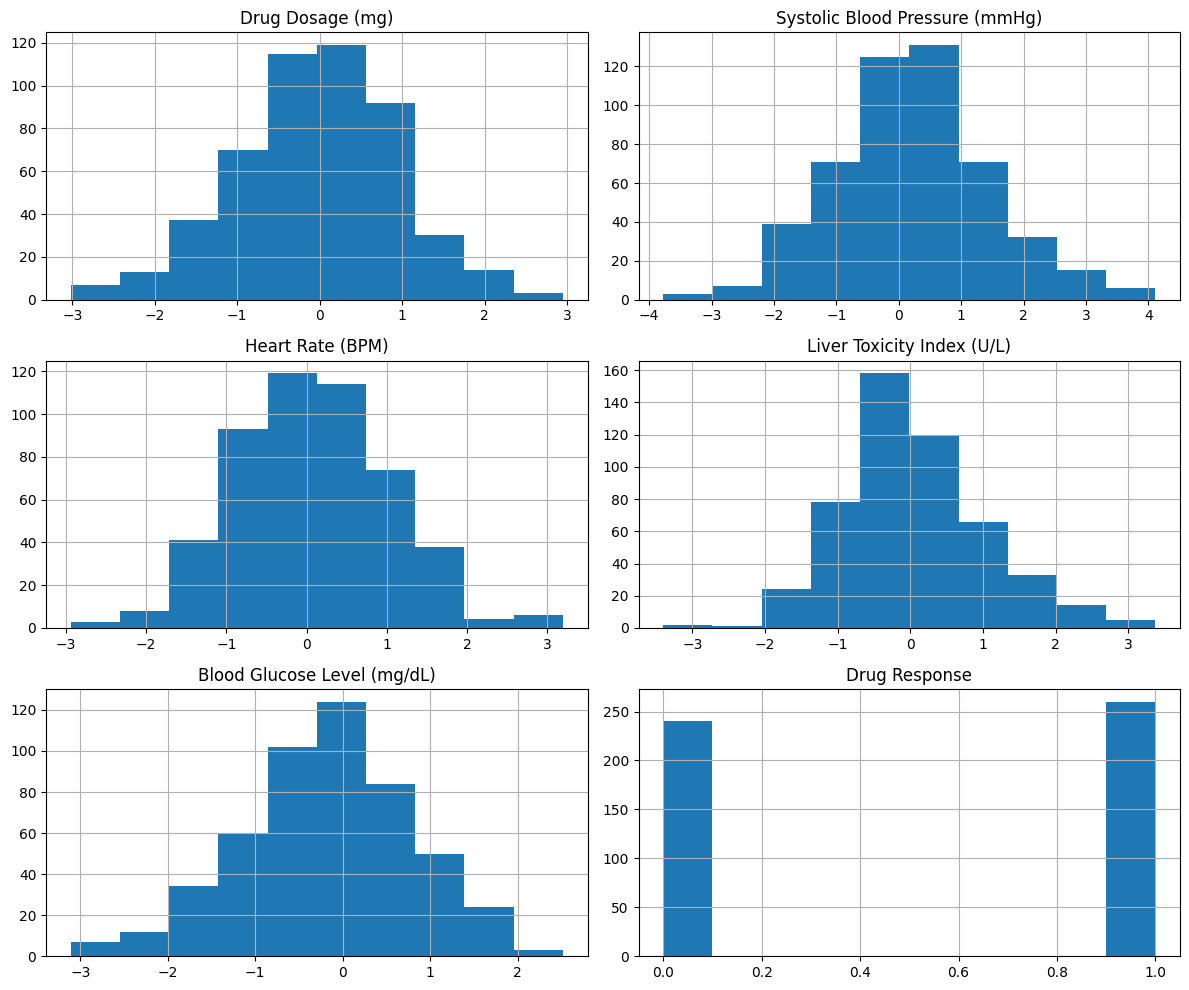

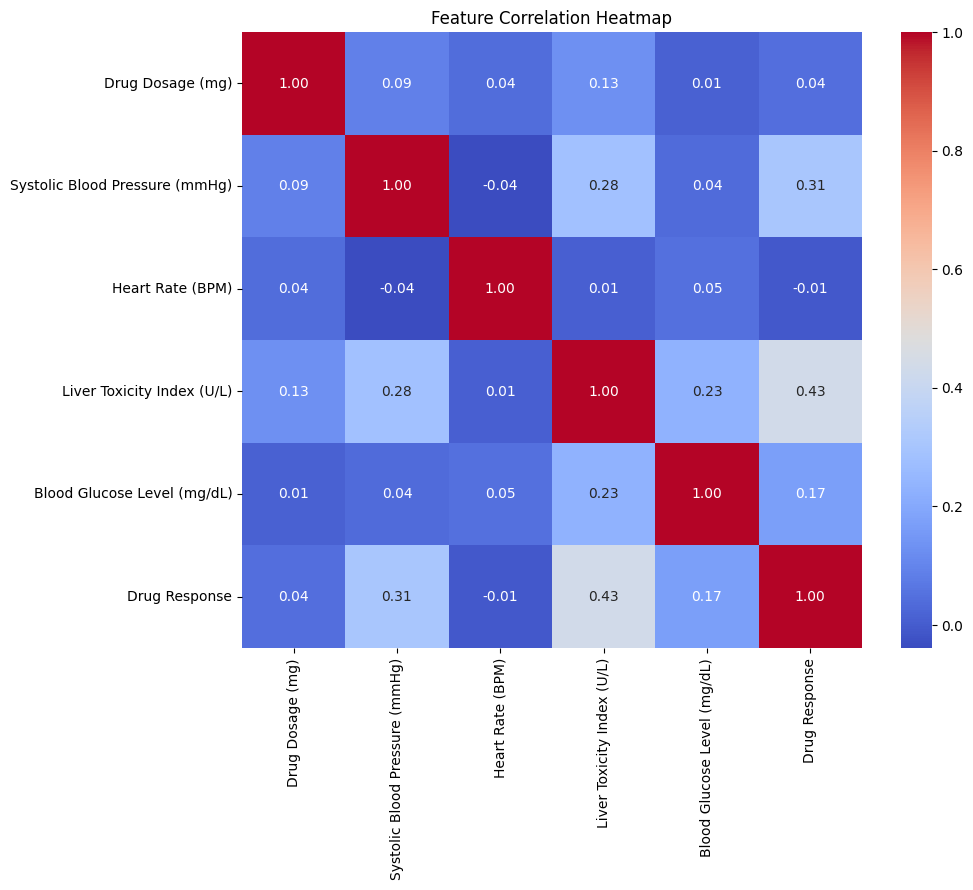

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize feature distributions using histograms
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Investigate feature correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Check for and encode categorical variables (if any)
# Based on the df.info() output, there are no categorical variables, so we can skip encoding.
# If there were categorical variables, we would use techniques like One-Hot Encoding.

# Separate features (X) and target (y)
X = df.drop('Drug Response', axis=1)
y = df['Drug Response']

# Split the dataset into training and testing sets
# Using 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# It's often beneficial to scale the features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled.")

Data split into training and testing sets:
X_train shape: (400, 5)
X_test shape: (100, 5)
y_train shape: (400,)
y_test shape: (100,)

Features scaled.


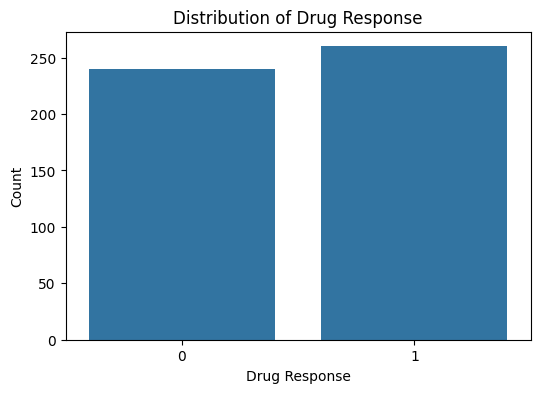

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Drug Response', data=df)
plt.title('Distribution of Drug Response')
plt.xlabel('Drug Response')
plt.ylabel('Count')
plt.show()

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Initialize and train the SVM model
# Using a radial basis function (RBF) kernel as a starting point
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

print("SVM model trained.")

# Predict on the testing set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Evaluation on Testing Data:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

SVM model trained.

Model Evaluation on Testing Data:
Accuracy: 0.8400
Precision: 0.8704
Recall: 0.8393
F1-score: 0.8545

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        44
           1       0.87      0.84      0.85        56

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100


Confusion Matrix:
[[37  7]
 [ 9 47]]


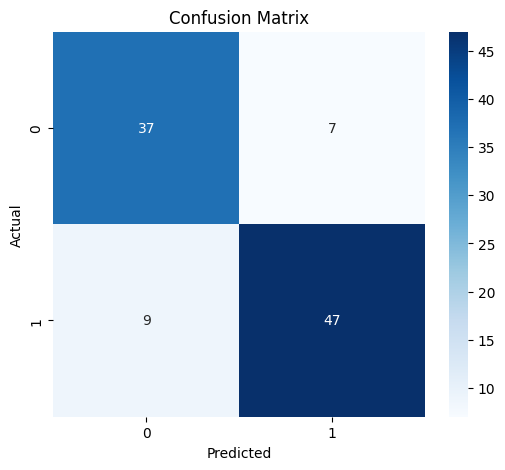

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [10]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')

# Perform grid search on the scaled training data
grid_search.fit(X_train_scaled, y_train)

print("Best parameters found:")
print(grid_search.best_params_)

# Get the best model
best_svm_model = grid_search.best_estimator_

# Evaluate the best model on the testing data
y_pred_best = best_svm_model.predict(X_test_scaled)

print("\nModel Evaluation with Best Parameters on Testing Data:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_best):.4f}")

print("\nClassification Report (Best Model):")
print(classification_report(y_test, y_pred_best))

print("\nConfusion Matrix (Best Model):")
print(confusion_matrix(y_test, y_pred_best))

Best parameters found:
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

Model Evaluation with Best Parameters on Testing Data:
Accuracy: 0.8400
Precision: 0.8704
Recall: 0.8393
F1-score: 0.8545

Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        44
           1       0.87      0.84      0.85        56

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100


Confusion Matrix (Best Model):
[[37  7]
 [ 9 47]]


## Task 7: Comparison and Analysis

Based on the steps performed, we can now compare and analyze the results:

**Comparison of SVM Performance:**

We initially trained an SVM model with a radial basis function (RBF) kernel and default hyperparameters. After performing GridSearchCV, we found that the best parameters for this dataset using the RBF kernel were `C=1` and `gamma='scale'`. The performance metrics (Accuracy, Precision, Recall, F1-score) for both the initial model and the model with the best parameters were the same on the testing data. This suggests that the initial default parameters for the RBF kernel were already quite effective for this dataset, or that the chosen parameter grid did not explore a significantly different performance space.

While we only explicitly tuned the RBF kernel in this example, the `param_grid` in the `GridSearchCV` included the 'linear' kernel as well. The `grid_search.best_params_` output indicates that the RBF kernel with `C=1` and `gamma='scale'` yielded the best accuracy during the cross-validation on the training set compared to the linear kernel and other parameter combinations in the grid.

**Analysis of SVM Strengths and Weaknesses for this Dataset:**

*   **Strengths:**
    *   SVM performed reasonably well on this dataset, achieving an accuracy of 84%.
    *   The class distribution was relatively balanced, which is generally favorable for SVMs.
    *   The data was scaled, which is a good practice for SVMs and likely contributed to its performance.

*   **Weaknesses:**
    *   The correlation heatmap showed low correlations between the features and the target variable 'Drug Response'. While SVM can handle non-linear relationships with kernels, the low linear correlation might indicate that more complex feature engineering or different models could potentially yield better results.
    *   The performance did not significantly improve after hyperparameter tuning within the defined grid, which could mean that the model's performance is close to its limit with the current features, or that a wider range of hyperparameters or different kernels should be explored.

**Practical Implications of SVM in Real-World Classification Tasks:**

SVMs are powerful and versatile algorithms for classification tasks. In a real-world pharmaceutical setting, a model like this could potentially be used for:

*   **Early prediction of drug response:** Identifying patients who are likely to respond positively to a drug based on their physiological parameters. This could help personalize treatment plans and avoid prescribing ineffective drugs.
*   **Patient stratification:** Grouping patients based on their predicted drug response to design more effective clinical trials or target specific patient populations with certain therapies.
*   **Optimizing drug dosage:** While this model predicts response, further analysis or a different modeling approach could potentially help determine optimal drug dosages based on individual patient characteristics.

However, it's crucial to remember that this is a simplified example. In a real-world scenario, more extensive data, rigorous validation, and consideration of other factors (e.g., patient history, genetics, potential side effects) would be necessary before deploying such a model. The model's predictions should also be interpreted by medical professionals in conjunction with their clinical expertise.

This concludes the planned steps for this task.